In [9]:
from findatapy.market import Market, MarketDataRequest, MarketDataGenerator

In [10]:
import matplotlib.pyplot as plt
import mplfinance as mpf 
import pickle
import numpy as np
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [11]:
#EURUSD, GBPUSD, AUDUSD, NZDUSD, USDNOK, USDCHF, USDCAD, USDJPY, USDSEK, USDDKK
currency = 'GBPUSD' #change currency here
from findatapy.market import Market, MarketDataRequest, MarketDataGenerator
def get_other_currency(start_date,finish_date):
    market = Market(market_data_generator=MarketDataGenerator())

    md_request = MarketDataRequest( start_date=start_date,
                                finish_date=finish_date,
                                fields=['bid', 'ask'], 
                                vendor_fields=['bid', 'ask'],
                                freq='tick', 
                                data_source='dukascopy',
                                tickers=[currency],
                                vendor_tickers=[currency])
    df = market.fetch_market(md_request)
    df['GBPUSD.mid'] = (df['GBPUSD.ask'] + df['GBPUSD.bid']) / 2.0
    
    return df

In [ ]:
def tick_to_ohlc(tick_df: pd.DataFrame, timeframe: str,pickle_file_name_ohlc=None) -> pd.DataFrame:
    '''
    Convert tick data to OHLC data.
    1 min = 1T
    1 Hr = 1H
    1 Day = 1D
    '''
    # Assuming the DataFrame is indexed by timestamp and has a 'Mid' column
    # for the mid prices. Adapt as necessary.

    # Resample the tick data to OHLC data using the specified timeframe
    ohlc_df = tick_df['GBPUSD.mid'].resample(timeframe).ohlc()
    
    # Drop rows where all values are NaN (which may happen in less active trading periods)
    ohlc_df.dropna(how='all', inplace=True)
    
    # write to pickle file
    if ohlc_df is not None and pickle_file_name_ohlc is not None:
        ohlc_df.to_pickle(pickle_file_name_ohlc)
    return ohlc_df

In [4]:
start_date_str = '14 Jun 2016'
end_date_str = '20 Jul 2016'
date_format = '%d %b %Y'
def get_date_pairs(start_date_str,end_date_str,date_format):
    # Parse the start and end dates
    start_date = datetime.strptime(start_date_str, date_format)
    end_date = datetime.strptime(end_date_str, date_format)

    # Initialize an empty list to hold the interval pairs
    interval_list = []

    # Increment by one month until we reach or surpass the end date
    current_date = start_date
    next_date = current_date + relativedelta(months=1)
    while next_date <= end_date:
        interval_list.append((current_date.strftime(date_format), next_date.strftime(date_format)))
        current_date = next_date
        next_date += relativedelta(months=1)

    # Add the remaining interval if there are extra days left
    if current_date != end_date:
        interval_list.append((current_date.strftime(date_format), end_date.strftime(date_format)))
        
    return interval_list

pair_list = get_date_pairs(start_date_str,end_date_str,date_format)
def get_candlestick_data(start_date,finish_date,timeframe: str):
    '''get candlestick data from start_date to finish_date with timeframe
    date format: 'dd mmm yyyy' like '14 Jun 2016'
    timeframe format:
    1 min = 1T
    1 Hr = 1H
    1 Day = 1D
    '''
    tick_data = get_other_currency(start_date,finish_date)
    ohlc_df = tick_to_ohlc(tick_data, timeframe)

    return ohlc_df,tick_data
def get_tick_data_optimised(start_date_str,end_date_str,pickle_file_name_ticks=None):
    # fixes the error where the api crashes the kernel
    date_format = '%d %b %Y'
    pair_list = get_date_pairs(start_date_str,end_date_str,date_format)
    df_list = []
    for pair in pair_list:
        print(pair[0],pair[1])
        df_list.append(get_other_currency(pair[0],pair[1]))
    df = pd.concat(df_list)
    if pickle_file_name_ticks is not None:
        df.to_pickle(pickle_file_name_ticks)
    return df

In [ ]:
def get_candlestick_data_optimised(start_date_str,end_date_str,timeframe,pickle_file_name_ticks=None,pickle_file_name_ohlc=None):
    df = get_tick_data_optimised(start_date_str,end_date_str,pickle_file_name_ticks)
    ohlc_df = tick_to_ohlc(df,timeframe,pickle_file_name_ohlc)
    return df,ohlc_df

In [25]:
years = ['2018','2019','2020'.'2021','2022'] # get 2018-2021 data
for i,year in enumerate(years[:-1]):
    get_tick_data_optimised('01 Jan '+year,'01 Jan '+years[i+1],'Data for Practicum 3/ticks_'+year+'.pkl')

01 Jan 2019 01 Feb 2019
2023-11-01 09:04:55,495 - findatapy.market.datavendorweb - INFO - Request Dukascopy data
2023-11-01 09:04:55,496 - findatapy.market.datavendorweb - INFO - About to download from Dukascopy... for GBPUSD


2023-11-01 09:04:55,506 - findatapy.market.datavendorweb - INFO - Downloading... 2019-01-01 00:00:00 https://www.dukascopy.com/datafeed/GBPUSD/2019/00/01/00h_ticks.bi5
2023-11-01 09:05:01,173 - findatapy.market.datavendorweb - INFO - Downloading... 2019-01-02 00:00:00 https://www.dukascopy.com/datafeed/GBPUSD/2019/00/02/00h_ticks.bi5
2023-11-01 09:05:09,326 - findatapy.market.datavendorweb - INFO - Downloading... 2019-01-03 00:00:00 https://www.dukascopy.com/datafeed/GBPUSD/2019/00/03/00h_ticks.bi5
2023-11-01 09:05:18,219 - findatapy.market.datavendorweb - INFO - Downloading... 2019-01-04 00:00:00 https://www.dukascopy.com/datafeed/GBPUSD/2019/00/04/00h_ticks.bi5
2023-11-01 09:05:25,095 - findatapy.market.datavendorweb - INFO - Downloading... 2019-01-05 00:00:00 https://www.dukascopy.com/datafeed/GBPUSD/2019/00/05/00h_ticks.bi5
2023-11-01 09:05:29,694 - findatapy.market.datavendorweb - INFO - Downloading... 2019-01-06 00:00:00 https://www.dukascopy.com/datafeed/GBPUSD/2019/00/06/00h_ti

### Change file in bp.py, function: data_gather_from_files to another file practicum data path of that currencies

In [10]:
df = pd.read_pickle('Data for Practicum 3/ticks_2020.pkl')
df.columns

Index(['GBPUSD.bid', 'GBPUSD.ask', 'GBPUSD.mid'], dtype='object')

In [13]:
def tick_data_describe(df):
    time_deltas = df.index.to_series().diff()
    price_deltas = df['GBPUSD.mid'].diff()
    spread = df['GBPUSD.ask'] - df['GBPUSD.bid']
    summary_data = {
        'Description': [
            'Number of ticks',
            'Mean time between ticks',
            'Median time between ticks',
            'Max time between ticks',
            'Min time between ticks',
            'Ticks with time delta > 10 minutes',
            'Ticks with time delta > 60 seconds',
            'Ticks with time delta > 1 second',
            'Ticks with time delta > 0.1 seconds',
            'Ticks with time delta < 0.1 seconds',
            'Mean price delta',
            'Median price delta',
            'Max price delta',
            'Min price delta',
            'instances with price delta < 0.0001',
            'instances with price delta > 0.0001',
            'instances with price delta > 0.001',
            'instances with price delta > 0.01',
            'instances with price delta > 0.1',
            'Mean spread',
            'Median spread',
            'Max spread',
            'Min spread',
            'instances with spread < 0.0001',
            'instances with spread > 0.0001',
            'instances with spread > 0.001',
            'instances with spread > 0.01',
            'instances with spread > 0.1',
        ],
        'Value': [
            len(df),
            time_deltas.mean(),
            time_deltas.median(),
            time_deltas.max(),
            time_deltas.min(),
            len(time_deltas[time_deltas > pd.Timedelta(minutes=10)]),
            len(time_deltas[time_deltas > pd.Timedelta(seconds=60)]),
            len(time_deltas[time_deltas > pd.Timedelta(seconds=1)]),
            len(time_deltas[time_deltas > pd.Timedelta(seconds=0.1)]),
            len(time_deltas[time_deltas < pd.Timedelta(seconds=0.1)]),
            price_deltas.mean(),
            price_deltas.median(),
            price_deltas.max(),
            price_deltas.min(),
            price_deltas[price_deltas < 0.0001].count(),
            price_deltas[price_deltas > 0.0001].count(),
            price_deltas[price_deltas > 0.001].count(),
            price_deltas[price_deltas > 0.01].count(),
            price_deltas[price_deltas > 0.1].count(),
            spread.mean(),
            spread.median(),
            spread.max(),
            spread.min(),
            spread[spread < 0.0001].count(),
            spread[spread > 0.0001].count(),
            spread[spread > 0.001].count(),
            spread[spread > 0.01].count(),
            spread[spread > 0.1].count(),
        ]
    }

    summary_df = pd.DataFrame(summary_data)
    fig, ax = plt.subplots(figsize=(10, 3))  # set the size
    ax.axis('off')
    ax.table(cellText=summary_df.values, colLabels=summary_df.columns, cellLoc = 'center',loc='center')
    plt.show()


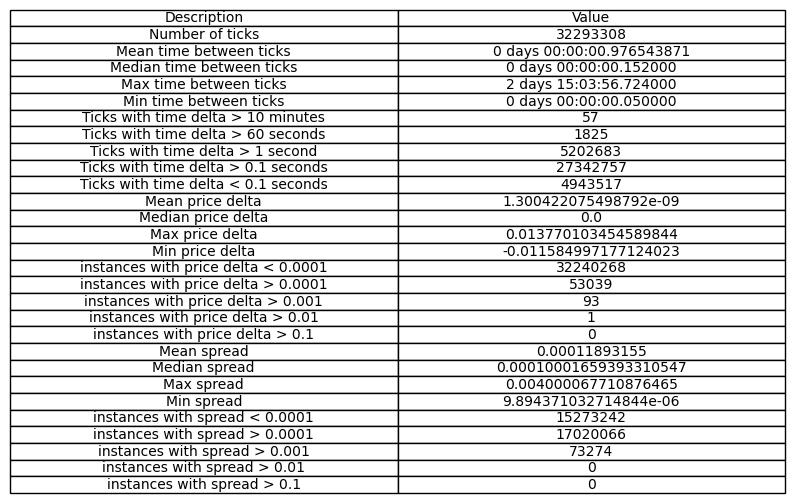

In [14]:
tick_data_describe(df)

In [ ]:
def ohlc_stats(ohlc):
    ohlc['returns'] = ohlc['close'].pct_change()
    ohlc['daily_returns'] = (ohlc['close']-ohlc['open'])/ohlc['open']
    fig,axs = plt.subplots(3,1,figsize=(10,10))
    axs[0].plot(ohlc['returns'])
    axs[1].hist(ohlc['returns'],bins=20)

    daily_volatility = ohlc['returns'].std()*np.sqrt(252)*100
    buy_and_hold_return = ((ohlc['returns']+1).prod() - 1)*100  # Adjusting to get the total return
    mean_return = ohlc['returns'].mean()*100

    stats_data = {
        'Description': [
            'Daily Volatility',
            'Buy and Hold Return',
            'Mean Return'
        ],
        'Value': [
            daily_volatility,
            buy_and_hold_return,
            mean_return
        ]
    }
    
    stats_df = pd.DataFrame(stats_data)
    axs[2].axis('off')
    axs[2].table(cellText=stats_df.values, colLabels=stats_df.columns, cellLoc = 'center',loc='center')
    fig.tight_layout()
    plt.show()


In [ ]:
def plot_data(ohlc_df):
    # Create a candlestick chart using mplfinance
    mpf.plot(ohlc_df, type='candle', title='Candlestick Chart',tight_layout=True, ylabel='Price', figratio=(15, 10),figsize=(15,10))
    plt.show()

In [ ]:
def data_analysis_for_bp(tick_data_file):
    df = pd.read_pickle(tick_data_file)
    tick_data_describe(df)
    ohlc = tick_to_ohlc(df, '1D')
    plot_data(ohlc)
    ohlc_stats(ohlc)

In [ ]:
df,ohlc = get_candlestick_data_optimised('1 Jan 2022','6 Feb 2022',timeframe='1D')
plot_data(ohlc)

In [ ]:
data_analysis_for_bp('Data for Practicum 3/ticks_2021.pkl')

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import pandas as pd
from bp import data_gather_from_files,run_strategy_optimised,run_strategy_eval
import time
from datetime import datetime
from dateutil.relativedelta import relativedelta
from GA_optimiser import *

### change walk forward to correct currencies

In [19]:
def walk_forward_analysis(evaluation_start, evaluation_end, evaluation_day,parameters,optimization_function = None, optimizer_params =[],  lookback_in_months = 6,evaluation_period = 3):
    generated_date_ranges = generate_date_ranges_for_walk_forward(evaluation_start, evaluation_end,evaluation_day,n_months = evaluation_period)
    df = {}
    for dates in generated_date_ranges:
        train_period = get_previous_n_months(dates[0], lookback_in_months)
        train_data = data_gather_from_files(train_period[0],train_period[1])['GBPUSD.mid']
        print('Data gathered for training period: ',train_period[0],train_period[1])
        test_data = data_gather_from_files(dates[0],dates[1])['GBPUSD.mid']
        print('Data gathered for testing period: ',dates[0],dates[1])
        max_loss,R_PNL,profit,optimal_params = optimization_function(train_data,test_data,parameters,optimizer_params)
        print('Optimal parameters are: ',optimal_params)
        print('Max loss,R_PNL,profit are: ',max_loss, R_PNL,profit)
        df[dates[0] +'-'+ dates[1]] = [max_loss, R_PNL,profit]
    df = pd.DataFrame(df).T
    df.columns = ['max_loss', 'R_PNL','profit']
    return df

In [20]:
def deap_optimiser_g_n_std(train_data, test_data, parameters, optimization_params):
    """
    Optimizes the parameters of a trading strategy using a genetic algorithm.
    
    Args:
    train_data (pandas.DataFrame): The training data used to optimize the strategy.
    test_data (pandas.DataFrame): The test data used to evaluate the optimized strategy.
    parameters (list): A list of two lists, where the first list contains the grid parameters and the second list contains the position parameters.
    optimization_params (list): A list of three parameters: the number of generations, the number of population, and the maximum number of stagnant generations before early stopping.
    
    Returns:
    tuple: A tuple containing the maximum loss, the return per unit of risk, the profit, and the optimal values of G and n.
    """
    ngen = optimization_params[0]  # number of generations
    npop = optimization_params[1]  # number of population

    error_check(parameters,2)
    
    grid_params = parameters[0]
    position_params = parameters[1]

    creator.create("FitnessMax", base.Fitness, weights=(1.0,)) #maximizing
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()

    # Define the genes for our individual
    toolbox.register("G_gene", random.randint, grid_params[0]//grid_params[2], grid_params[1]//grid_params[2])
    toolbox.register("n_gene", random.randint, position_params[0]//position_params[2], position_params[1]//position_params[2])

    # Create an individual with the genes
    toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.G_gene, toolbox.n_gene), n=1)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    def objective(individual):
        G, n = individual[0]*grid_params[2], individual[1]*position_params[2]
        max_loss, R_PNL, profit, std = run_strategy_optimised(train_data, G, n)
    
        constraints = [
            max_loss < -500e3
        ]

        if any(constraints):
            return float('-inf'),  # Return large negative value when constraints are not satisfied
        return profit/std,

    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutUniformInt, low=[grid_params[0]//grid_params[2], position_params[0]//position_params[2]], 
                     up=[grid_params[1]//grid_params[2], position_params[1]//position_params[2]], indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)   ##############
    toolbox.register("evaluate", objective)

    population = toolbox.population(n=npop)
    CXPB, MUTPB = 0.5, 0.2

    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    #initiate early stopping
    stagnant_generations = 0  # Counter for generations without improvement
    MAX_STAGNANT_GEN = optimization_params[2]  # Early stopping criterion: stop if no improvement over x generations
    best_fitness_so_far = float('-inf')  # since we're maximizing
    ##
    for gen in range(ngen):
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))
        
        # Crossover
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values
        
        # Mutation
        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        fitnesses = list(map(toolbox.evaluate, offspring))
        for ind, fit in zip(offspring, fitnesses):
            ind.fitness.values = fit

        #early stopping
        current_best_fitness = max(ind.fitness.values[0] for ind in population)

        if current_best_fitness > best_fitness_so_far:
            best_fitness_so_far = current_best_fitness
            stagnant_generations = 0  # Reset counter
        else:
            stagnant_generations += 1

        if stagnant_generations >= MAX_STAGNANT_GEN:
            print(f"Early stopping on generation {gen} due to no improvement.")
            break
        ##
        population[:] = offspring

    best_ind = tools.selBest(population, 1)[0]
    optimal_g = np.round(best_ind[0]*grid_params[2],5)
    optimal_n = best_ind[1]*position_params[2]
    print("optimisation completed")
    max_loss, R_PNL,profit,std  = run_strategy_optimised(test_data, optimal_g,optimal_n)
    return max_loss, R_PNL,profit,[optimal_g,optimal_n]

Test

In [22]:
grid_params = [0.001,0.01,0.0005]
lot_params = [100000,2000000,100000]

n_grid_params = ((grid_params[1]-grid_params[0])/grid_params[2])
n_lot_params = ((lot_params[1]-lot_params[0])/lot_params[2])

print('number of grid params:-',(n_grid_params))
print('number of lot params:-',(n_lot_params))
print('total_number_of_combinations:-',(n_grid_params*n_lot_params))

# Adjust these parameter according to search space
n_trials = 10 #NGEN
npop = 100
early_stopping_gen = 10 # no early stopping
optimizer_param = [n_trials, npop, early_stopping_gen]

parameters = [grid_params,lot_params]

results0 = walk_forward_analysis('jan 2021','jan 2022',1,parameters,optimization_function=deap_optimiser_g_n_std,optimizer_params=optimizer_param,lookback_in_months=6,evaluation_period=3)
results0


number of grid params:- 18.0
number of lot params:- 19.0
total_number_of_combinations:- 342.0
Data gathered for training period:  01 Jul 2020 31 Dec 2020
Data gathered for testing period:  01 Jan 2021 31 Mar 2021
optimisation completed
Optimal parameters are:  [0.0095, 1900000]
Max loss,R_PNL,profit are:  -113900.0 -34179.1667 -70770.0
Data gathered for training period:  01 Oct 2020 31 Mar 2021
Data gathered for testing period:  01 Apr 2021 30 Jun 2021
optimisation completed
Optimal parameters are:  [0.001, 700000]
Max loss,R_PNL,profit are:  -33600.0 158009.1625 158200.0
Data gathered for training period:  01 Jan 2021 30 Jun 2021
Data gathered for testing period:  01 Jul 2021 30 Sep 2021
optimisation completed
Optimal parameters are:  [0.001, 900000]
Max loss,R_PNL,profit are:  -97200.0 -58958.7496 -90090.0
Data gathered for training period:  01 Apr 2021 30 Sep 2021
Data gathered for testing period:  01 Oct 2021 31 Dec 2021
optimisation completed
Optimal parameters are:  [0.0015, 2000

,max_loss,R_PNL,profit
01 Jan 2021-31 Mar 2021,-113900.0,-34179.1667,-70770.0
01 Apr 2021-30 Jun 2021,-33600.0,158009.1625,158200.0
01 Jul 2021-30 Sep 2021,-97200.0,-58958.7496,-90090.0
01 Oct 2021-31 Dec 2021,-65700.0,130260.0005,130380.0


In [26]:
grid_params = [0.001,0.01,0.0005]
lot_params = [100000,2000000,100000]

n_grid_params = ((grid_params[1]-grid_params[0])/grid_params[2])
n_lot_params = ((lot_params[1]-lot_params[0])/lot_params[2])

print('number of grid params:-',(n_grid_params))
print('number of lot params:-',(n_lot_params))
print('total_number_of_combinations:-',(n_grid_params*n_lot_params))

# Adjust these parameter according to search space
n_trials = 10 #NGEN
npop = 100
early_stopping_gen = 10 # no early stopping
optimizer_param = [n_trials, npop, early_stopping_gen]

parameters = [grid_params,lot_params]

results0 = walk_forward_analysis('jan 2019','jan 2021',1,parameters,optimization_function=deap_optimiser_g_n_std,optimizer_params=optimizer_param,lookback_in_months=3,evaluation_period=1)
results0


number of grid params:- 18.0
number of lot params:- 19.0
total_number_of_combinations:- 342.0
Data gathered for training period:  01 Oct 2018 31 Dec 2018
Data gathered for testing period:  01 Jan 2019 31 Jan 2019
optimisation completed
Optimal parameters are:  [0.0015, 1600000]
Max loss,R_PNL,profit are:  -388800.0 -299040.0004 -299040.0
Data gathered for training period:  01 Nov 2018 31 Jan 2019
Data gathered for testing period:  01 Feb 2019 28 Feb 2019
optimisation completed
Optimal parameters are:  [0.0015, 100000]
Max loss,R_PNL,profit are:  -22500.0 14958.6833 7480.0
Data gathered for training period:  01 Dec 2018 28 Feb 2019
Data gathered for testing period:  01 Mar 2019 31 Mar 2019
optimisation completed
Optimal parameters are:  [0.006, 1900000]
Max loss,R_PNL,profit are:  -102600.0 189335.0001 158840.0
Data gathered for training period:  01 Jan 2019 31 Mar 2019
Data gathered for testing period:  01 Apr 2019 30 Apr 2019
optimisation completed
Optimal parameters are:  [0.0085, 19

,max_loss,R_PNL,profit
01 Jan 2019-31 Jan 2019,-388800.0000,-299040.0004,-299040.0000
01 Feb 2019-28 Feb 2019,-22500.0000,14958.6833,7480.0000
01 Mar 2019-31 Mar 2019,-102600.0000,189335.0001,158840.0000
01 Apr 2019-30 Apr 2019,0.0000,42655.0000,36860.0000
01 May 2019-31 May 2019,-146000.0000,-90833.6194,-133360.0000
01 Jun 2019-30 Jun 2019,-36000.0000,82140.0000,91620.0000
01 Jul 2019-31 Jul 2019,-176250.0000,-166035.0000,-165270.0000
01 Aug 2019-31 Aug 2019,-16200.0000,34740.0000,34740.0000
01 Sep 2019-30 Sep 2019,-236000.0000,-99377.7783,-100800.0000
01 Oct 2019-31 Oct 2019,-283500.0000,-147122.4232,-158580.0000
